In [1]:
try:
    # Comment out if not using colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Specific for luca's computer
    %cd "/content/drive/Othercomputers/Min MacBook Pro/INFO381-GitHub"
    using_colab = True
except:
    print("Not using Google Colab")
    using_colab = False

Not using Google Colab


In [2]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import time
from sklearn.model_selection import KFold

from utils import get_dataloaders

/Users/ot/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ot/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
train_loader = get_dataloaders(batch_size=32, split = 'train')
print(train_loader)

Not running in Google Colab
Folder '../fake_vs_real/' exists. Loading...


Overwrite the transform of the dataset inside train_loader

In [13]:
resize_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])

train_loader.dataset.transform = resize_transform

### Function to show images

In [14]:
def show_batch(data_loader, num_images):

    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    plt.figure(figsize=(20, 4))
    for i in range(min(num_images, len(images))):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].permute(1, 2, 0))
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')

    plt.show()

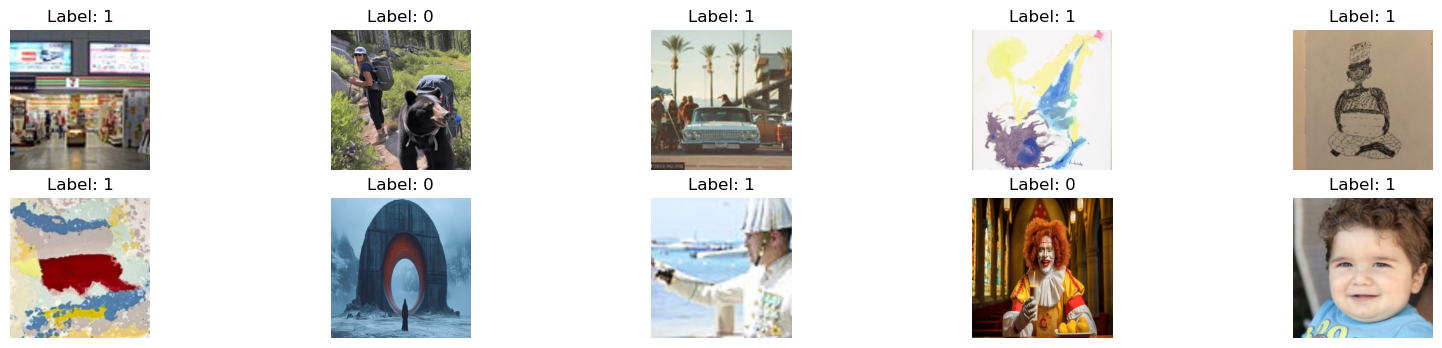

In [15]:
show_batch(train_loader, num_images = 10)

### Defining the model

Using the pre-trained ResNet18.
Resnet-18 is trained on the huge ImageNet dataset, which contains more than 1 million images

In [16]:
model = models.resnet18(pretrained = True)

/Users/ot/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ot/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Modify the final layer to match 2 classes (fake and real)

In [17]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

In [18]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training the model

In [19]:
num_epochs = 1

for epoch in range(num_epochs):
    start_time = time.time()

    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Track loss

        # Calculate accuracy
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    # Calculate average loss and accuracy for this epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total * 100

    # End time for this epoch
    end_time = time.time()
    epoch_time = end_time - start_time

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Time: {epoch_time:.2f} seconds")

# After training, save the model
torch.save(model.state_dict(), "models/resnet18_cnn.pth")
print("Model saved successfully!")

Epoch [1/1], Loss: 0.3372, Accuracy: 86.64%, Time: 3956.56 seconds
Model saved successfully!
